In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import random

from IPython.display import Image
%matplotlib inline


def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == labels) / predictions.shape[0])

## 1. Load the data

In [3]:
data = input_data.read_data_sets("../data/MNIST/", one_hot=False)

Extracting ../data/MNIST/train-images-idx3-ubyte.gz
Extracting ../data/MNIST/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
print ("Size of train set: %s" % len(data.train.images))
print ("Size of test set: %s" % len(data.test.images))
print ("Size of validation set: %s" % len(data.validation.images))

Size of train set: 55000
Size of test set: 10000
Size of validation set: 5000


## 2. Look at some examples

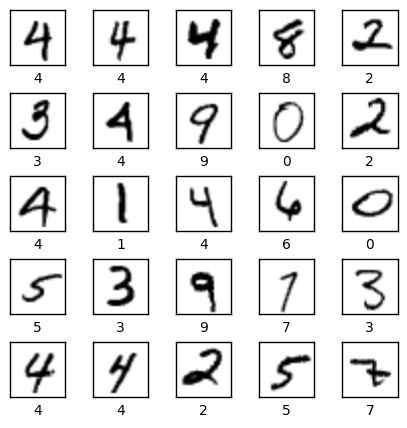

In [6]:
rand_list = random.sample(range(1, data.test.images.shape[0]), 25)
images = data.test.images[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(5, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel=data.test.labels[rand_list[i]]
    ax.set_xlabel(xlabel)
    
plt.savefig('../images/mnist_examples.png')

## 3. Simple logistic regression

### 3.1. Model architecture

In [5]:
IMAGE_SIZE = 28
NUM_CHANNELS = 1
NUM_LABELS = 10
BATCH_SIZE = 100


tf_train_dataset = tf.placeholder(tf.float32, shape=(BATCH_SIZE, IMAGE_SIZE * IMAGE_SIZE)) 
tf_train_labels = tf.placeholder(tf.int64, shape=(BATCH_SIZE)) 
tf_valid_dataset = tf.constant(data.validation.images) 
tf_test_dataset = tf.constant(data.test.images)
  
# Variables to optimize:
weights = tf.Variable(tf.truncated_normal([IMAGE_SIZE * IMAGE_SIZE, NUM_LABELS]))
biases = tf.Variable(tf.zeros([NUM_LABELS]))
  
# Training computation:
logits = tf.matmul(tf_train_dataset, weights) + biases
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, tf_train_labels)
loss = tf.reduce_mean(cross_entropy)
  
# Optimizer:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss) # learning rate = 0.5

** Predictions for the training, validation, and test data **

In [6]:
train_prediction = tf.nn.softmax(logits) 
valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases) 
test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

### 3.2. Train the model, report accuracy

In [21]:
NUM_ITERATIONS = 2001

pred = []
#weights_list = []

with tf.Session() as session:
    tf.global_variables_initializer().run()
    for i in range(NUM_ITERATIONS):
        batch_data, batch_labels = data.train.next_batch(BATCH_SIZE)
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict) 
        
        if (i % 400 == 0): ## info will be printed every 400th time
            print("Minibatch loss at step %d: %f" % (i, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), data.validation.labels))    
    print("\nTest accuracy: %.1f%%" % accuracy(test_prediction.eval(), data.test.labels))
    
    #w = session.run(weights)
    #weights_list.append(w)

    pred.append(np.argmax(test_prediction.eval(), 1))

pred = pred[0]
#weights_list = weights_list[0]

Minibatch loss at step 0: 10.268036
Minibatch accuracy: 22.0%
Validation accuracy: 17.9%
Minibatch loss at step 400: 1.147419
Minibatch accuracy: 82.0%
Validation accuracy: 85.4%
Minibatch loss at step 800: 0.570579
Minibatch accuracy: 87.0%
Validation accuracy: 88.6%
Minibatch loss at step 1200: 0.325225
Minibatch accuracy: 93.0%
Validation accuracy: 89.7%
Minibatch loss at step 1600: 0.527301
Minibatch accuracy: 86.0%
Validation accuracy: 89.6%
Minibatch loss at step 2000: 0.422387
Minibatch accuracy: 89.0%
Validation accuracy: 90.4%

Test accuracy: 89.9%


### 3.3. Show examples that were predicted wrong/ correct

In [22]:
correct = [e for e,y in enumerate(pred == data.test.labels) if y == True]
incorrect = [e for e,y in enumerate(pred == data.test.labels) if y == False]

images_incorrect = data.test.images[incorrect]
cls_pred_incorrect = pred[incorrect]
cls_true_incorrect = data.test.labels[incorrect]
                                      
images_correct = data.test.images[correct]
cls_pred_correct = pred[correct]
cls_true_correct = data.test.labels[correct]


These images are wrongly classified:


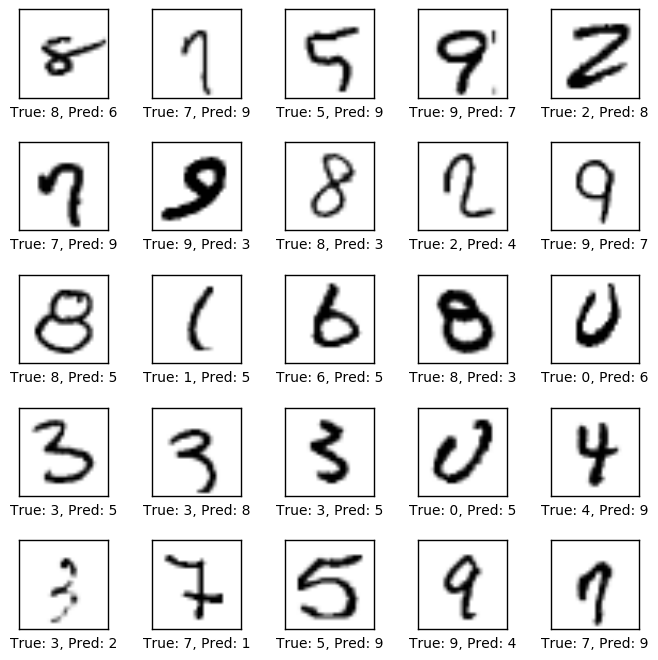

In [23]:
print ('\nThese images are wrongly classified:')

rand_list = random.sample(range(1, images_incorrect.shape[0]), 25)
images = images_incorrect[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel = "True: {0}, Pred: {1}".format(cls_true_incorrect[rand_list[i]], cls_pred_incorrect[rand_list[i]])
    ax.set_xlabel(xlabel)


These images are correctly classified:


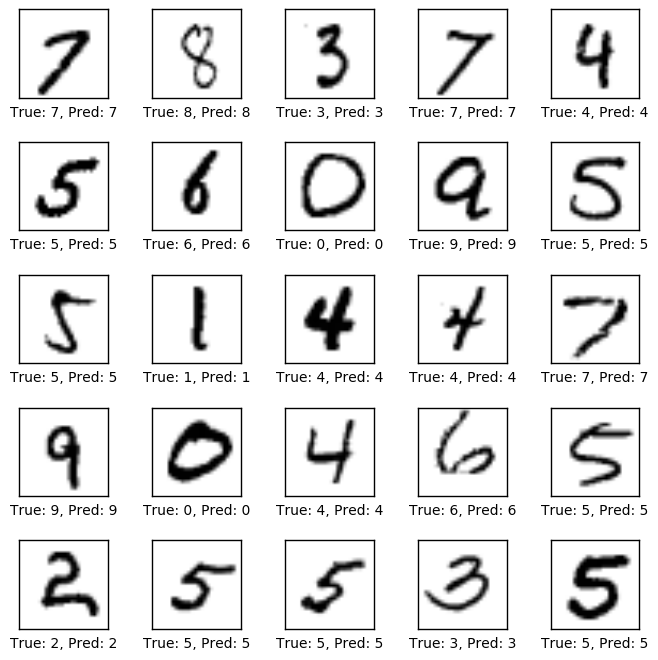

In [24]:
print ('\nThese images are correctly classified:')

rand_list = random.sample(range(1, images_correct.shape[0]), 25)
images = images_correct[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel = "True: {0}, Pred: {1}".format(cls_true_correct[rand_list[i]], cls_pred_correct[rand_list[i]])
    ax.set_xlabel(xlabel)

### 3.4. Confusion matrix

[[ 937    0    4    1    1   13   15    3    3    3]
 [   0 1087    6    3    0    5    2    2   28    2]
 [   6    4  890   23   17    8   11   14   56    3]
 [   3    0   19  888    2   35    5   15   34    9]
 [   4    2    4    3  893    1   18    3   13   41]
 [  14    2    5   34   11  726   24   11   53   12]
 [   9    2    6    0   14   16  904    3    4    0]
 [   6    5   23   10    6    1    0  944    6   27]
 [   9    8   10   23    8   18   16    8  863   11]
 [  11    6    0   10   58    7    2   44   15  856]]


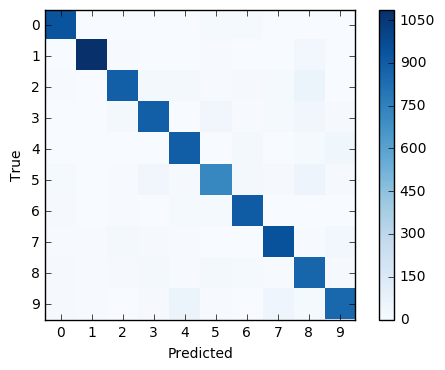

In [25]:
cm = confusion_matrix(y_true=data.test.labels, y_pred=pred)
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted')
plt.ylabel('True')

## 4. Neural net with 1 hidden layer (ReLu activation function)

### 4.1. Model architecture

In [26]:
IMAGE_SIZE = 28
NUM_CHANNELS = 1
NUM_LABELS = 10
BATCH_SIZE = 100
NUM_NEURONS = 1000

tf_train_dataset = tf.placeholder(tf.float32, shape=(BATCH_SIZE, IMAGE_SIZE * IMAGE_SIZE)) 
tf_train_labels = tf.placeholder(tf.int64, shape=(BATCH_SIZE)) 
tf_valid_dataset = tf.constant(data.validation.images) 
tf_test_dataset = tf.constant(data.test.images)

w1 = tf.Variable(tf.truncated_normal([IMAGE_SIZE * IMAGE_SIZE, NUM_NEURONS])) 
b1 = tf.Variable(tf.zeros([NUM_NEURONS])) 
w2 = tf.Variable(tf.truncated_normal([NUM_NEURONS, NUM_LABELS])) 
b2 = tf.Variable(tf.zeros([NUM_LABELS])) 

def twoNN(X):
    return tf.matmul(tf.nn.relu(tf.matmul(X, w1) + b1), w2) + b2

logits = twoNN(tf_train_dataset) 
loss = tf.reduce_mean(
  tf.nn.sparse_softmax_cross_entropy_with_logits(logits, tf_train_labels))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

** Predictions for the training, validation, and test data **

In [27]:
train_prediction = tf.nn.softmax(logits) 
valid_prediction = tf.nn.softmax(twoNN(tf_valid_dataset))
test_prediction = tf.nn.softmax(twoNN(tf_test_dataset))

### 4.2. Train the model, report accuracy

In [28]:
NUM_ITERATIONS = 2001

pred = []
#weights_list = []

with tf.Session() as session:
    tf.global_variables_initializer().run()
    for i in range(NUM_ITERATIONS):
        batch_data, batch_labels = data.train.next_batch(BATCH_SIZE)
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict) 
        
        if (i % 400 == 0): ## info will be printed every 400th time
            print("Minibatch loss at step %d: %f" % (i, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), data.validation.labels))    
    print("\nTest accuracy: %.1f%%" % accuracy(test_prediction.eval(), data.test.labels))
    
    #w = session.run(weights)
    #weights_list.append(w)

    pred.append(np.argmax(test_prediction.eval(), 1))

pred = pred[0]
#weights_list = weights_list[0]

Minibatch loss at step 0: 236.036407
Minibatch accuracy: 10.0%
Validation accuracy: 17.7%
Minibatch loss at step 400: 0.781254
Minibatch accuracy: 92.0%
Validation accuracy: 91.7%
Minibatch loss at step 800: 0.294426
Minibatch accuracy: 94.0%
Validation accuracy: 93.0%
Minibatch loss at step 1200: 0.194854
Minibatch accuracy: 95.0%
Validation accuracy: 93.9%
Minibatch loss at step 1600: 0.245095
Minibatch accuracy: 97.0%
Validation accuracy: 94.2%
Minibatch loss at step 2000: 0.036807
Minibatch accuracy: 99.0%
Validation accuracy: 94.3%

Test accuracy: 93.9%


### 4.3. Show examples that were predicted wrong/ correct

In [29]:
correct = [e for e,y in enumerate(pred == data.test.labels) if y == True]
incorrect = [e for e,y in enumerate(pred == data.test.labels) if y == False]

images_incorrect = data.test.images[incorrect]
cls_pred_incorrect = pred[incorrect]
cls_true_incorrect = data.test.labels[incorrect]
                                      
images_correct = data.test.images[correct]
cls_pred_correct = pred[correct]
cls_true_correct = data.test.labels[correct]


These images are wrongly classified:


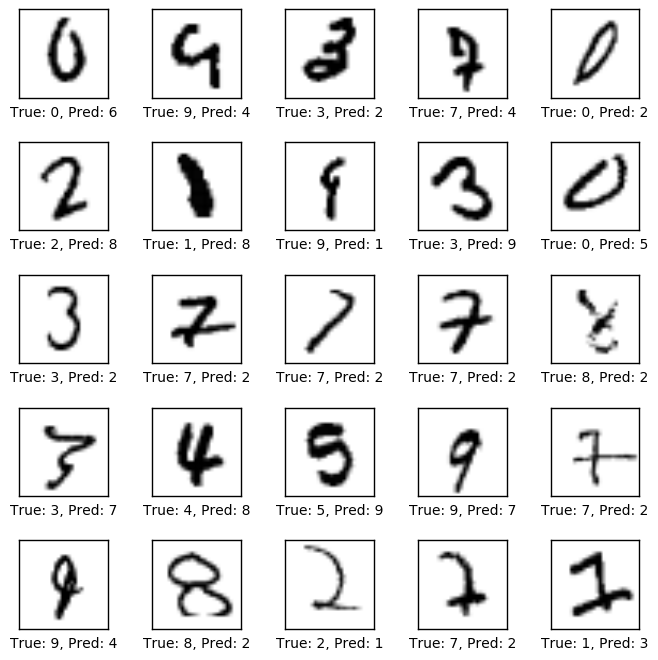

In [30]:
print ('\nThese images are wrongly classified:')

rand_list = random.sample(range(1, images_incorrect.shape[0]), 25)
images = images_incorrect[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel = "True: {0}, Pred: {1}".format(cls_true_incorrect[rand_list[i]], cls_pred_incorrect[rand_list[i]])
    ax.set_xlabel(xlabel)


These images are correctly classified:


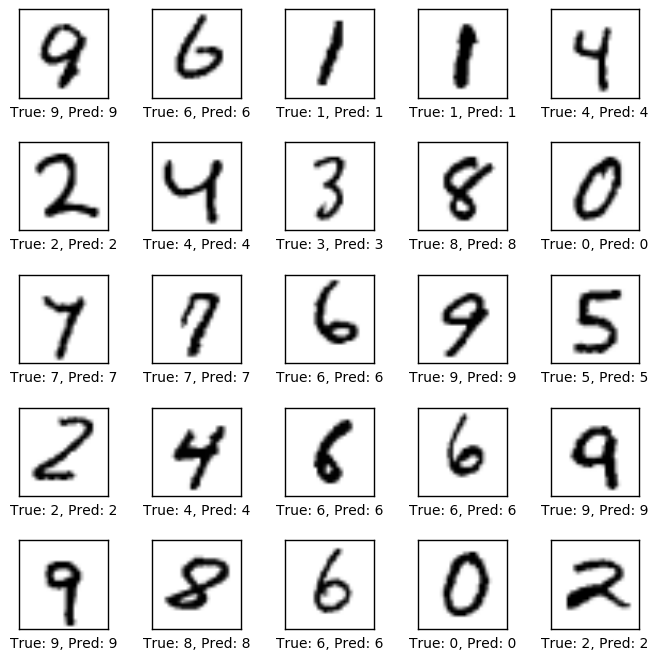

In [31]:
print ('\nThese images are correctly classified:')

rand_list = random.sample(range(1, images_correct.shape[0]), 25)
images = images_correct[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel = "True: {0}, Pred: {1}".format(cls_true_correct[rand_list[i]], cls_pred_correct[rand_list[i]])
    ax.set_xlabel(xlabel)

### 4.4 Confusion matrix

[[ 948    0    4    2    2   14    4    2    3    1]
 [   0 1104    9    5    2    1    1    6    6    1]
 [   4    4  972   24    1    1    2    7   16    1]
 [   0    1   18  942    0   22    1   12    9    5]
 [   1    1    7    1  927    2    8    5    8   22]
 [   4    1    6   20    1  827    6    1   17    9]
 [  10    2    7    1    5   14  913    0    6    0]
 [   1    5   14   13    4    1    0  973    5   12]
 [  12    3   16   11    5   16    7    8  891    5]
 [   2    4    1   12   42   12    0   22   17  897]]


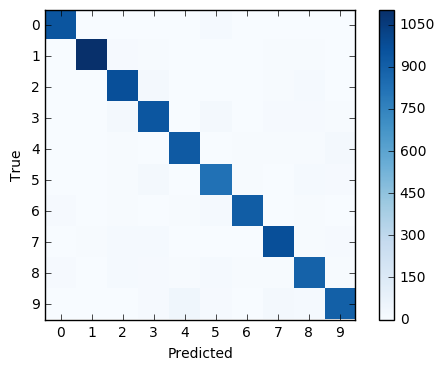

In [32]:
cm = confusion_matrix(y_true=data.test.labels, y_pred=pred)
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted')
plt.ylabel('True')

## 5. More complex model with the following architecture:

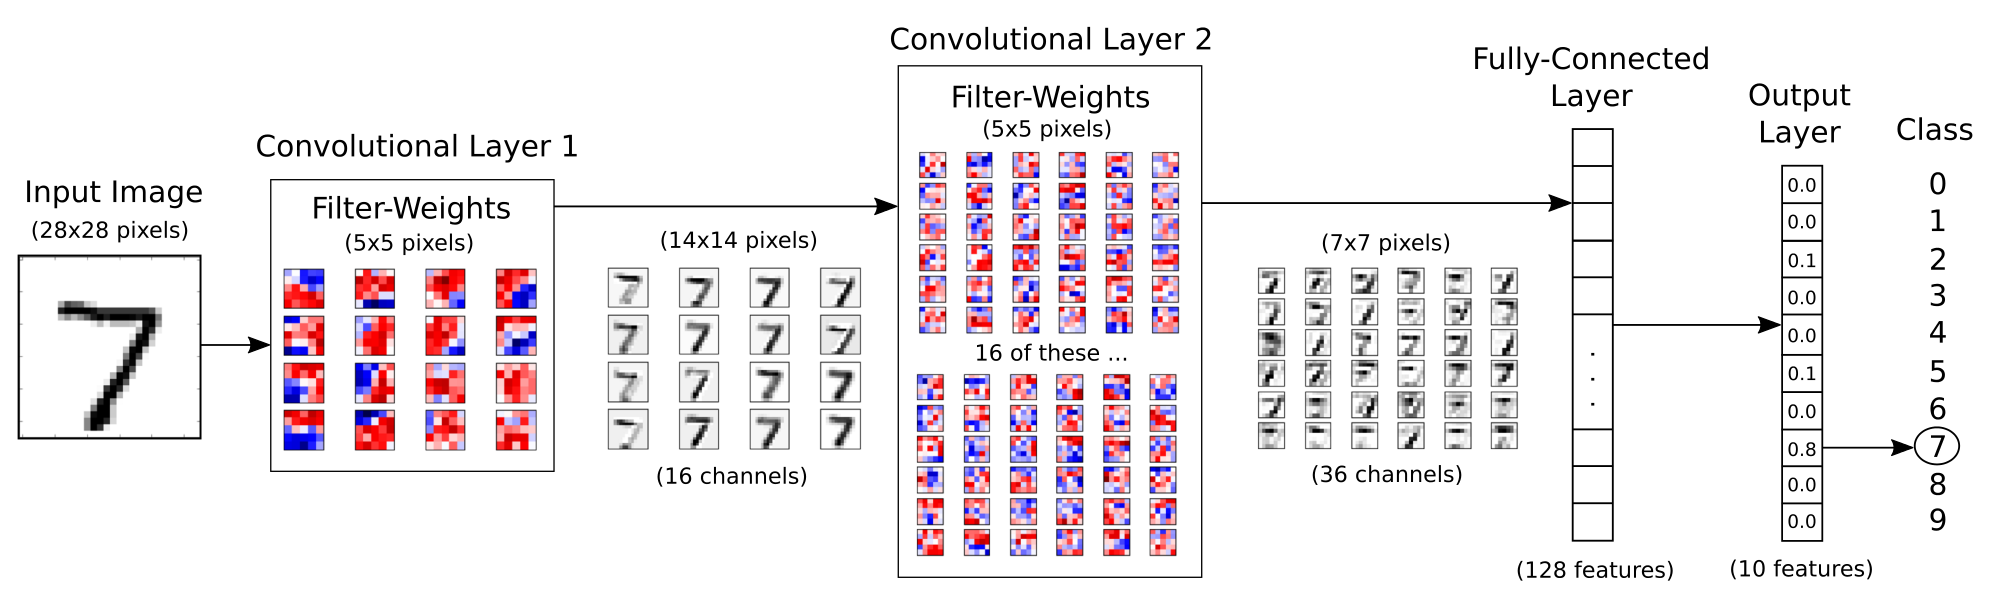

In [3]:
Image('../02_network_flowchart.png')

### 5.1. Model architecture

In [35]:
IMAGE_SIZE = 28
NUM_CHANNELS = 1
NUM_LABELS = 10
BATCH_SIZE = 100
FILTER_SIZE = 5
NUM_FILTERS_1 = 16
NUM_FILTERS_2 = 36
NUM_NEURONS = 128

train_dataset, train_labels = data.train.images.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS)),\
                              data.train.labels.astype(np.int32)
valid_dataset, valid_labels = data.validation.images.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS)),\
                              data.validation.labels.astype(np.int32)
test_dataset, test_labels = data.test.images.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS)),\
                              data.test.labels.astype(np.int32)


tf_train_dataset = tf.placeholder(tf.float32, shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))
tf_train_labels = tf.placeholder(tf.int64, shape=(BATCH_SIZE))
tf_valid_dataset = tf.constant(valid_dataset) 
tf_test_dataset = tf.constant(test_dataset)

## 1st convolutional layer
conv1_weights = tf.Variable(tf.truncated_normal([FILTER_SIZE, FILTER_SIZE, NUM_CHANNELS, NUM_FILTERS_1],
                                                stddev=0.1))
conv1_biases = tf.Variable(tf.zeros([NUM_FILTERS_1]))

## 2nd convolutional layer
conv2_weights = tf.Variable(tf.truncated_normal([FILTER_SIZE, FILTER_SIZE, NUM_FILTERS_1, NUM_FILTERS_2],
                                                stddev=0.1))
conv2_biases = tf.Variable(tf.constant(1.0, shape=[NUM_FILTERS_2]))

## fully connected layer:
fc1_weights = tf.Variable(tf.truncated_normal([IMAGE_SIZE // 4 * IMAGE_SIZE // 4 * NUM_FILTERS_2, NUM_NEURONS],
                                                   stddev=0.1))
fc1_biases = tf.Variable(tf.constant(1.0, shape=[NUM_NEURONS]))
  
fc2_weights = tf.Variable(tf.truncated_normal([NUM_NEURONS, NUM_LABELS], stddev=0.1))
fc2_biases = tf.Variable(tf.constant(1.0, shape=[NUM_LABELS]))
  
# Model:
def model(data):    
    
    # 1st Conv Layer +ReLu+max pooling (a pooling window of 2, and a stride of 2)
    conv = tf.nn.conv2d(data, conv1_weights, strides=[1, 1, 1, 1], padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases))
    pool = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') 
    
    # 2nd Conv Layer +ReLu+max pooling (a pooling window of 2, and a stride of 2)
    conv = tf.nn.conv2d(pool, conv2_weights, [1, 1, 1, 1], padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases))
    pool = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Flatten layer   
     # Get the shape of the input layer.
    layer_shape = pool.get_shape()
    #layer_shape == [num_images, img_height, img_width, num_channels]
    
    # The number of features is: img_height * img_width * num_channels
    num_features = layer_shape[1:4].num_elements()   
    # Reshape the layer to [num_images, num_features].
    layer_flat = tf.reshape(pool, [-1, num_features])
    
    # Fully connected  
    hidden = tf.nn.relu(tf.matmul(layer_flat, fc1_weights) + fc1_biases)
    return tf.matmul(hidden, fc2_weights) + fc2_biases  
  
# Training computation:
logits = model(tf_train_dataset)
loss = tf.reduce_mean(
  tf.nn.sparse_softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
# Optimizer:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

** Predictions for the training, validation, and test data **

In [36]:
train_prediction = tf.nn.softmax(logits)
valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
test_prediction = tf.nn.softmax(model(tf_test_dataset))

## 5.2. Train the model, report accuracy

In [37]:
NUM_ITERATIONS = 2001

pred = []
#weights_list = []

with tf.Session() as session:
    tf.global_variables_initializer().run()
    for i in range(NUM_ITERATIONS):
        offset = (i * BATCH_SIZE) % (train_labels.shape[0] - BATCH_SIZE)
        batch_data = train_dataset[offset:(offset + BATCH_SIZE), :, :, :]
        batch_labels = train_labels[offset:(offset + BATCH_SIZE)] 
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict) 
        
        if (i % 500 == 0): ## info will be printed every 500th time
            print("Minibatch loss at step %d: %f" % (i, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), data.validation.labels))    
    print("\nTest accuracy: %.1f%%" % accuracy(test_prediction.eval(), data.test.labels))
    
    #w = session.run(weights)
    #weights_list.append(w)

    pred.append(np.argmax(test_prediction.eval(), 1))

pred = pred[0]
#weights_list = weights_list[0]

Minibatch loss at step 0: 7.049674
Minibatch accuracy: 9.0%
Validation accuracy: 9.2%
Minibatch loss at step 500: 0.313661
Minibatch accuracy: 92.0%
Validation accuracy: 92.6%
Minibatch loss at step 1000: 0.248879
Minibatch accuracy: 91.0%
Validation accuracy: 94.4%
Minibatch loss at step 1500: 0.041997
Minibatch accuracy: 100.0%
Validation accuracy: 95.8%
Minibatch loss at step 2000: 0.138663
Minibatch accuracy: 96.0%
Validation accuracy: 96.6%

Test accuracy: 96.4%


### 5.3. Show examples that were predicted wrong/ correct

In [38]:
correct = [e for e,y in enumerate(pred == data.test.labels) if y == True]
incorrect = [e for e,y in enumerate(pred == data.test.labels) if y == False]

images_incorrect = data.test.images[incorrect]
cls_pred_incorrect = pred[incorrect]
cls_true_incorrect = data.test.labels[incorrect]
                                      
images_correct = data.test.images[correct]
cls_pred_correct = pred[correct]
cls_true_correct = data.test.labels[correct]


These images are wrongly classified:


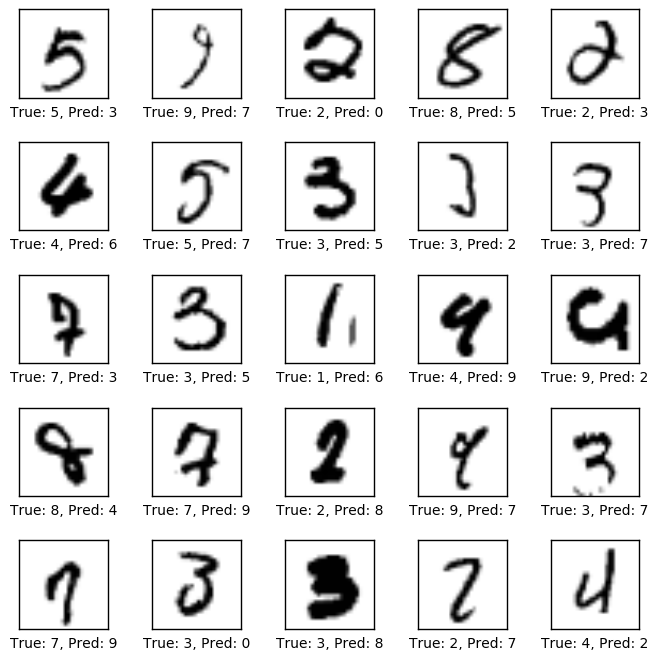

In [42]:
print ('\nThese images are wrongly classified:')

rand_list = random.sample(range(1, images_incorrect.shape[0]), 25)
images = images_incorrect[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel = "True: {0}, Pred: {1}".format(cls_true_incorrect[rand_list[i]], cls_pred_incorrect[rand_list[i]])
    ax.set_xlabel(xlabel)


These images are correctly classified:


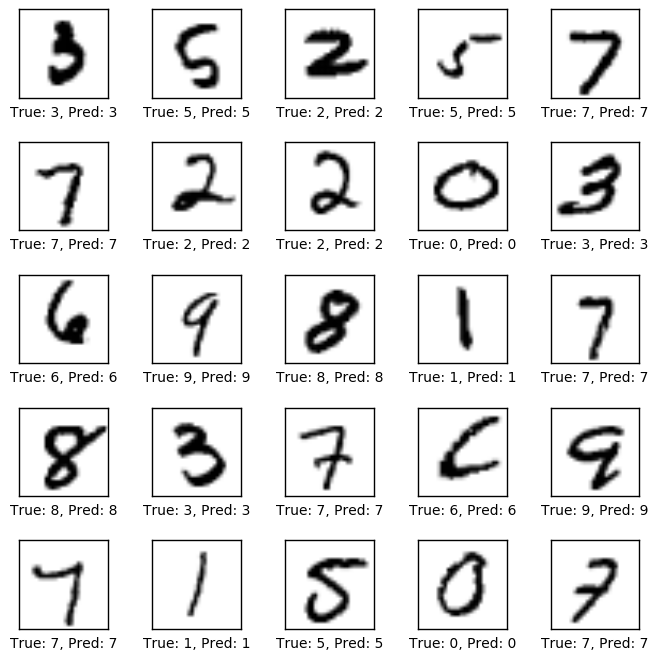

In [40]:
print ('\nThese images are correctly classified:')

rand_list = random.sample(range(1, images_correct.shape[0]), 25)
images = images_correct[rand_list,:]

fig, axes = plt.subplots(5,5,figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28,28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    xlabel = "True: {0}, Pred: {1}".format(cls_true_correct[rand_list[i]], cls_pred_correct[rand_list[i]])
    ax.set_xlabel(xlabel)

### 5.4 Confusion matrix

[[ 972    1    2    2    0    0    2    1    0    0]
 [   0 1124    5    0    0    0    2    0    4    0]
 [  10    3 1001    3    1    0    2    7    5    0]
 [   2    0   14  960    0   13    0    8    9    4]
 [   1    3    7    0  931    0   10    3    2   25]
 [   6    2    1   15    0  852    7    2    4    3]
 [  11    4    3    0    5    4  929    0    2    0]
 [   0    4   29    4    0    0    0  985    1    5]
 [   8    4   10    6    3    4    4    6  929    0]
 [  11    6    3    8    8    4    0    9    5  955]]


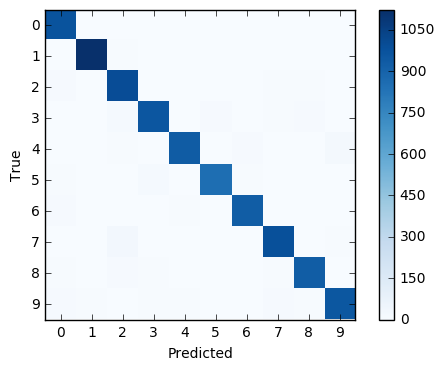

In [41]:
cm = confusion_matrix(y_true=data.test.labels, y_pred=pred)
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted')
plt.ylabel('True')